<a href="https://colab.research.google.com/github/Hanyan-Wu/MachineLearningLab/blob/main/Oversamping_Undersampling_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/ColabNotebooks/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df_select = df[['trans_date_trans_time', 'category', 'amt', 'city_pop']]
df_select['trans_date_trans_time'] = pd.to_datetime(df_select['trans_date_trans_time'])

# frauds usually happen between 1 a.m. and 6 a.m.
df_select['time_var'] = [i.hour for i in df_select['trans_date_trans_time']]
df_select['time_var'] = [1 if 7 > i > 0 else 0 for i in df_select['time_var']]
df_select['time_var'].describe()

X = pd.get_dummies(df_select, ['category'], drop_first= True).drop(['trans_date_trans_time'], axis= 1)
y = df['is_fraud']
X.head()

<ipython-input-6-bc35c36f761c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['trans_date_trans_time'] = pd.to_datetime(df_select['trans_date_trans_time'])
<ipython-input-6-bc35c36f761c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_var'] = [i.hour for i in df_select['trans_date_trans_time']]
<ipython-input-6-bc35c36f761c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,amt,city_pop,time_var,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [8]:
X_train

,amt,city_pop,time_var,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
349587,38.16,1517,1,0,0,0,0,0,0,0,0,1,0,0,0,0
139045,3.77,4172,0,0,0,0,0,0,0,0,0,0,0,1,0,0
192422,4.66,2401,0,0,0,0,0,0,0,0,0,1,0,0,0,0
230353,86.71,1504,0,0,0,0,1,0,0,0,0,0,0,0,0,0
506193,67.29,477,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331303,122.52,568,0,0,0,0,1,0,0,0,0,0,0,0,0,0
363966,5.49,2607,0,0,0,0,0,0,0,0,0,0,0,0,0,1
308155,51.88,328,1,0,1,0,0,0,0,0,0,0,0,0,0,0
544661,3.87,2208,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [9]:
X_test

,amt,city_pop,time_var,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
50864,104.32,15623,0,0,0,0,0,0,0,0,0,0,1,0,0,0
220830,48.92,3833,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120762,21.24,134056,0,0,0,0,0,0,1,0,0,0,0,0,0,0
72977,8.40,7163,0,0,0,0,0,0,0,0,0,0,0,1,0,0
220005,33.50,1126,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,13.43,601723,0,0,0,0,0,0,0,0,0,0,0,0,0,0
314532,145.63,129,1,0,0,0,1,0,0,0,0,0,0,0,0,0
327467,5.96,1758,0,0,0,0,0,0,0,0,0,0,0,0,0,1
195254,47.56,19408,1,0,0,1,0,0,0,0,0,0,0,0,0,0


# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

In [11]:
# Oversample
ros = RandomOverSampler(random_state=0)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

In [12]:
# Look at the number of records after oversampling 
sorted(Counter(y_train_over).items())

[(0, 387480), (1, 387480)]

In [13]:
# Undersample
rus = RandomUnderSampler(random_state=0)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [14]:
# Look at the number of records after undersampling 
sorted(Counter(y_train_under).items())

[(0, 1523), (1, 1523)]

In [15]:
# SMOTE
oversample = SMOTE()
X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train, y_train)

In [16]:
# Look at the number of records after oversampling using SMOTE
sorted(Counter(y_train_SMOTE).items())

[(0, 387480), (1, 387480)]

# 3.) Train three logistic regression models 

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log_over = LogisticRegression().fit(X_train_over, y_train_over)

In [19]:
log_under = LogisticRegression().fit(X_train_under, y_train_under)

In [20]:
log_SMOTE = LogisticRegression().fit(X_train_SMOTE, y_train_SMOTE)

# 4.) Test the three models

In [21]:
# The accuracy of the oversampling model
print(f'The accuracy of logistic regression using oversampled data is {log_over.score(X_test, y_test)}.')

The accuracy of logistic regression using oversampled data is 0.17680966433935555.


In [22]:
# The accuracy of the undersampling model
print(f'The accuracy of logistic regression using undersampled data is {log_under.score(X_test, y_test)}.')

The accuracy of logistic regression using undersampled data is 0.17684565368650879.


In [23]:
# The accuracy of the SMOTE model
print(f'The accuracy of logistic regression using SMOTE data is {log_SMOTE.score(X_test, y_test)}.')

The accuracy of logistic regression using SMOTE data is 0.1784051920631493.


# 5.) Which performed best in Out of Sample metrics?

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

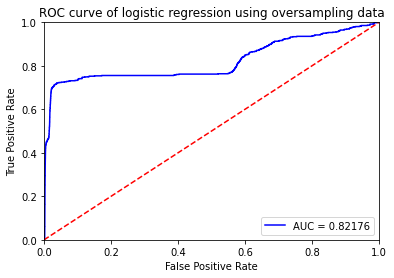

In [36]:
# Oversampling
# make predictions on the test data using predict_proba
y_pred_over = log_over.predict_proba(X_test)[:, 1]

# calculate the false positive rate, true positive rate and thresholds
fpr_over, tpr_over, thresholds_over = roc_curve(y_test, y_pred_over)

# calculate the AUC score
roc_auc_over = auc(fpr_over, tpr_over)

# plot the ROC curve
plt.title('ROC curve of logistic regression using oversampling data')
plt.plot(fpr_over, tpr_over, 'b', label = 'AUC = %0.5f' % roc_auc_over)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

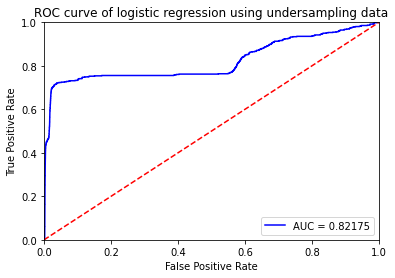

In [37]:
# Undersampling
# make predictions on the test data using predict_proba
y_pred_under = log_under.predict_proba(X_test)[:, 1]

# calculate the false positive rate, true positive rate and thresholds
fpr_under, tpr_under, thresholds_under = roc_curve(y_test, y_pred_under)

# calculate the AUC score
roc_auc_under = auc(fpr_under, tpr_under)

# plot the ROC curve
plt.title('ROC curve of logistic regression using undersampling data')
plt.plot(fpr_under, tpr_under, 'b', label = 'AUC = %0.5f' % roc_auc_under)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

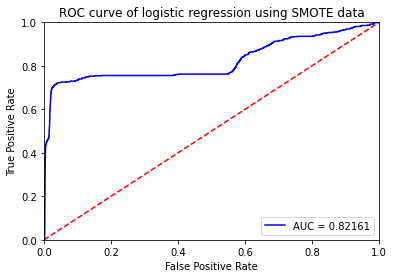

In [38]:
# SMOTE
# make predictions on the test data using predict_proba
y_pred_SMOTE = log_SMOTE.predict_proba(X_test)[:, 1]

# calculate the false positive rate, true positive rate and thresholds
fpr_SMOTE, tpr_SMOTE, thresholds_SMOTE = roc_curve(y_test, y_pred_SMOTE)

# calculate the AUC score
roc_auc_SMOTE = auc(fpr_SMOTE, tpr_SMOTE)

# plot the ROC curve
plt.title('ROC curve of logistic regression using SMOTE data')
plt.plot(fpr_SMOTE, tpr_SMOTE, 'b', label = 'AUC = %0.5f' % roc_auc_SMOTE)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The SMOTE method is the best model in terms of accuracy as shown in the 4th question. However, the oversample method is the best according to AUC scores.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [31]:
raw_temp = pd.concat([X_train, y_train], axis = 1)

Text(0, 0.5, 'Population')

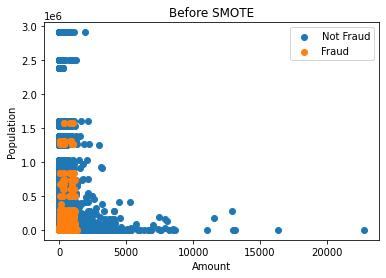

In [33]:
# Before SMOTE
plt.title('Before SMOTE')
plt.scatter(raw_temp[raw_temp['is_fraud'] == 0]['amt'], raw_temp[raw_temp['is_fraud'] == 0]['city_pop'])
plt.scatter(raw_temp[raw_temp['is_fraud'] == 1]['amt'], raw_temp[raw_temp['is_fraud'] == 1]['city_pop'])
plt.legend(['Not Fraud', 'Fraud'])
plt.xlabel('Amount')
plt.ylabel('Population')

In [34]:
raw_SMOTE = pd.concat([X_train_SMOTE, y_train_SMOTE], axis = 1)

Text(0, 0.5, 'Population')

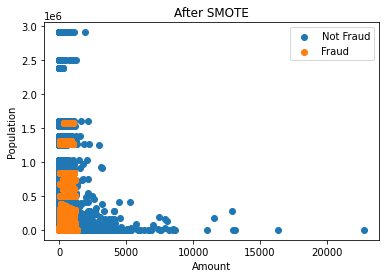

In [35]:
# Before SMOTE
plt.title('After SMOTE')
plt.scatter(raw_SMOTE[raw_SMOTE['is_fraud'] == 0]['amt'], raw_SMOTE[raw_SMOTE['is_fraud'] == 0]['city_pop'])
plt.scatter(raw_SMOTE[raw_SMOTE['is_fraud'] == 1]['amt'], raw_SMOTE[raw_SMOTE['is_fraud'] == 1]['city_pop'])
plt.legend(['Not Fraud', 'Fraud'])
plt.xlabel('Amount')
plt.ylabel('Population')